In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from collections.abc import Set
from pathlib import Path



warnings.filterwarnings("ignore")

**Vorschlag Zielwert ZQ Synergy**

$PE(GFZ)= min( 1,63*(\frac{35.2}{GFZ+0,15}-27.3) ; 100) $     $[kWh_{PE}/m²_{BGF}a]$

In [2]:
# ZQ Austria Vorschlag

GFZ = np.linspace(0.0, 8, 800) #min, max, steps
def target(
        GFZ=GFZ,
        fPE=1.63, # OIB 2019 Jahresmittel
        A=35.2,
        dx=0.15,
        EUI=27.3,
        cutoff=100,
        scale=1
) -> pd.DataFrame:
    curve = (fPE * (A/(dx + GFZ) - EUI )) * scale
    return np.minimum(curve, cutoff) if cutoff else curve

In [3]:
PEQ_alfa = pd.DataFrame({
    "Positive Energy Balance":np.zeros(len(GFZ)),
    "ZQ1 Endbericht":target(GFZ, A=37, dx=0.085,EUI=29.14, cutoff=None),
    "ZQ1 Formel (auf NGF bezogen)":
        target(GFZ, A=37, dx=0.085,EUI=29.14, fPE=1.63*0.8, cutoff=None),
    "Vorschlag ZQ Synergy": target(GFZ),
}, index=GFZ)


In [4]:
def plot_context_factor(ax, df, ylims=(-75,150), xlims=(0,8), no_legend=False):
    if no_legend: # names with leading underscore dont show
        df.columns = ["_" + col for col in df.columns]
    df.plot(ax=ax, linestyle="solid", linewidth=1, )
    ax.set_ylim(*ylims); ax.set_xlim(*xlims)
    ax.set_ylabel("PE-Balance $[{kWh/m²_{BGF}a}]$")
    ax.set_xlabel("Floor space index")
    ax.grid()

    #ax.legend(title='', bbox_to_anchor=(1, 1), loc='upper left')

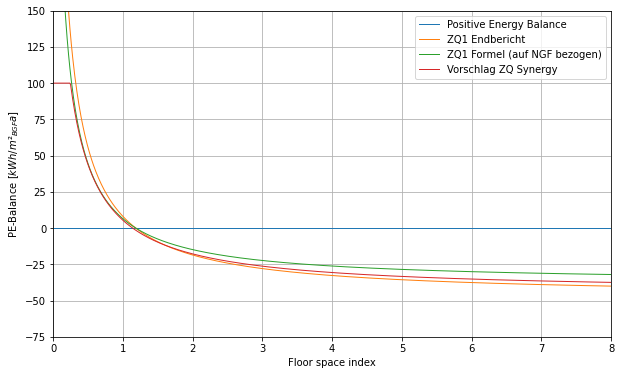

In [5]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
plot_context_factor(ax, df=PEQ_alfa)

Specify excel path

In [6]:
def reload_datasource(path = Path(r"C:\NextCloud_rd\EE\1_Forschung\2_Laufend\Plusenergie-Campus Energybase 2.0 (Sdz 9)\4_Quartier\PEExcel_final\PEC Varianten.xlsx")
):
    return pd.read_excel(path)
    
df = reload_datasource()

In [7]:
df.head()

,Name,Quartier,depth,Linie,Forschungsprojekt,Land,Stadt,Variante,Mikroquartier,Generation,...,Primärenergiesaldo ohne Dichteausgleich [kWh/m²NGFa].1,PE-Saldo Ziel NGF [kWh/m²NGFa].1,PE-Anforderung erreicht? Werte inkl. Dichtebonus [kWh/m²NGFa].1,"PE-Saldo Ziel BGF default (NGF/BGF=0,8) [kWh/m²BGFa].1","PE-Saldo Ziel BGF real (NGF/BGF=0,85) [kWh/m²BGFa].1",Heizenergie [MWh/a],Kühlenergie [MWh/a],Umweltenergiepotential Freifläche [MWh/a],Umweltenergiepotential Innenhof [MWh/a],Umweltenergiepotential Straße/Gehweg [MWh/a]
0,Blockrand 1,NaN,0.0,1.0,Plus Energie Campus,AT,Wien,NaN,Blockrand 1,Bestand,...,-187.559190,-14.701743,-172.857448,-11.761394,-11.761394,1832.669047,0.0,154,106.4,742.0
1,Blockrand 1,NaN,0.0,2.0,Plus Energie Campus,AT,Wien,NaN,Blockrand 1,Bestand,...,-187.559190,-14.701743,-172.857448,-11.761394,-11.761394,1832.669047,0.0,154,106.4,742.0
2,Blockrand 1,NaN,0.0,3.0,Plus Energie Campus,AT,Wien,NaN,Blockrand 1,Bestand,...,-187.559190,-14.701743,-172.857448,-11.761394,-11.761394,1832.669047,0.0,154,106.4,742.0
3,BR1 - OIB san - 0% m. WRG,NaN,10.0,1.0,Plus Energie Campus,AT,Wien,NaN,Blockrand 1,thermische Hülle,...,-131.153322,-14.701743,-116.451579,-11.761394,-11.761394,770.899221,0.0,154,106.4,742.0
4,BR1 - OIB san - 0% m. WRG,NaN,10.0,4.0,Plus Energie Campus,AT,Wien,NaN,Blockrand 1,thermische Hülle,...,-131.153322,-14.701743,-116.451579,-11.761394,-11.761394,770.899221,0.0,154,106.4,742.0


Identify the required columns

In [8]:
df.columns

Index(['Name', 'Quartier', 'depth', 'Linie', 'Forschungsprojekt', 'Land',
       'Stadt', 'Variante', 'Mikroquartier', 'Generation',
       ...
       'Primärenergiesaldo ohne Dichteausgleich [kWh/m²NGFa].1',
       'PE-Saldo Ziel NGF [kWh/m²NGFa].1',
       'PE-Anforderung erreicht? Werte inkl. Dichtebonus [kWh/m²NGFa].1',
       'PE-Saldo Ziel BGF default (NGF/BGF=0,8) [kWh/m²BGFa].1',
       'PE-Saldo Ziel BGF real (NGF/BGF=0,85) [kWh/m²BGFa].1',
       'Heizenergie [MWh/a]', 'Kühlenergie [MWh/a]',
       'Umweltenergiepotential Freifläche [MWh/a]',
       'Umweltenergiepotential Innenhof [MWh/a]',
       'Umweltenergiepotential Straße/Gehweg [MWh/a]'],
      dtype='object', length=380)

In [9]:
available = set(df.columns)

PEB_varname = "Primärenergiesaldo ohne Dichteausgleich [kWh/m²NGFa].1"
PEB_target = 'PE-Saldo Ziel NGF [kWh/m²NGFa].1'
PE_Demand = "PEBedarf [kWh/m²NGFa].4"
required = {
    "Name",
    "depth",
    "Linie",
    "Mikroquartier",
    "Generation",
    "Gebäudehülle",
    "Lüftung mit WRG",
    "PV",
    "JAZ",
    "Reduktion Nutzerstrom",
    "ecars",
    "WPS",
    "Klima",

    "GFZ [-]",
    PE_Demand,
    PEB_varname,
    PEB_target,
    'PE-Saldo Ziel BGF default (NGF/BGF=0,8) [kWh/m²BGFa].1',
    'Heizenergie [MWh/a]',
    'Kühlenergie [MWh/a]',
    'Umweltenergiepotential Freifläche [MWh/a]',
    'Umweltenergiepotential Innenhof [MWh/a]',
    'Umweltenergiepotential Straße/Gehweg [MWh/a]'

}

print("missing columns:\n", required - available)

missing columns:
 set()


In [10]:
for c in df.columns:
    if "PE" in c:
        print(c)

PEBedarf [kWh/m²NGFa]
CO2,PE Profil
PEBedarf [kWh/m²NGFa].1
PEExport [kWh/m²NGFa]
PESaldo [kWh/m²NGFa]
PEBedarf [kWh/m²NGFa].2
PEExport [kWh/m²NGFa].1
PESaldo [kWh/m²NGFa].1
PEBedarf [kWh/m²NGFa].3
PEExport [kWh/m²NGFa].2
PESaldo [kWh/m²NGFa].2
PE-Saldo Ziel NGF [kWh/m²NGFa]
PE-Anforderung erreicht? Werte inkl. Dichtebonus [kWh/m²NGFa]
PE-Saldo Ziel BGF default (NGF/BGF=0,8) [kWh/m²BGFa]
PE-Saldo Ziel BGF real (NGF/BGF=0,85) [kWh/m²BGFa]
PEBedarf [kWh/m²NGFa].4
PEExport [kWh/m²NGFa].3
PESaldo [kWh/m²NGFa].3
PE-Saldo Ziel NGF [kWh/m²NGFa].1
PE-Anforderung erreicht? Werte inkl. Dichtebonus [kWh/m²NGFa].1
PE-Saldo Ziel BGF default (NGF/BGF=0,8) [kWh/m²BGFa].1
PE-Saldo Ziel BGF real (NGF/BGF=0,85) [kWh/m²BGFa].1


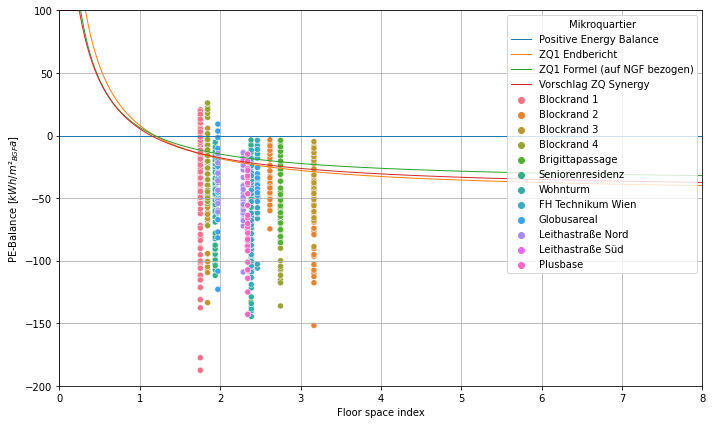

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
plot_context_factor(ax, df=PEQ_alfa, ylims=(-200,100))
sns.set_palette("Set2") #"Reds"
sns.scatterplot(ax=ax,
                x="GFZ [-]",
                y=PEB_varname,
                hue="Mikroquartier",
                data=df)
plt.tight_layout()

In [12]:
subplot_columns = [
    "Mikroquartier",
    "Gebäudehülle",
    "Lüftung mit WRG",
    "PV",
    "JAZ",
    "Reduktion Nutzerstrom",
    "ecars",
    "WPS",
    "Klima"]

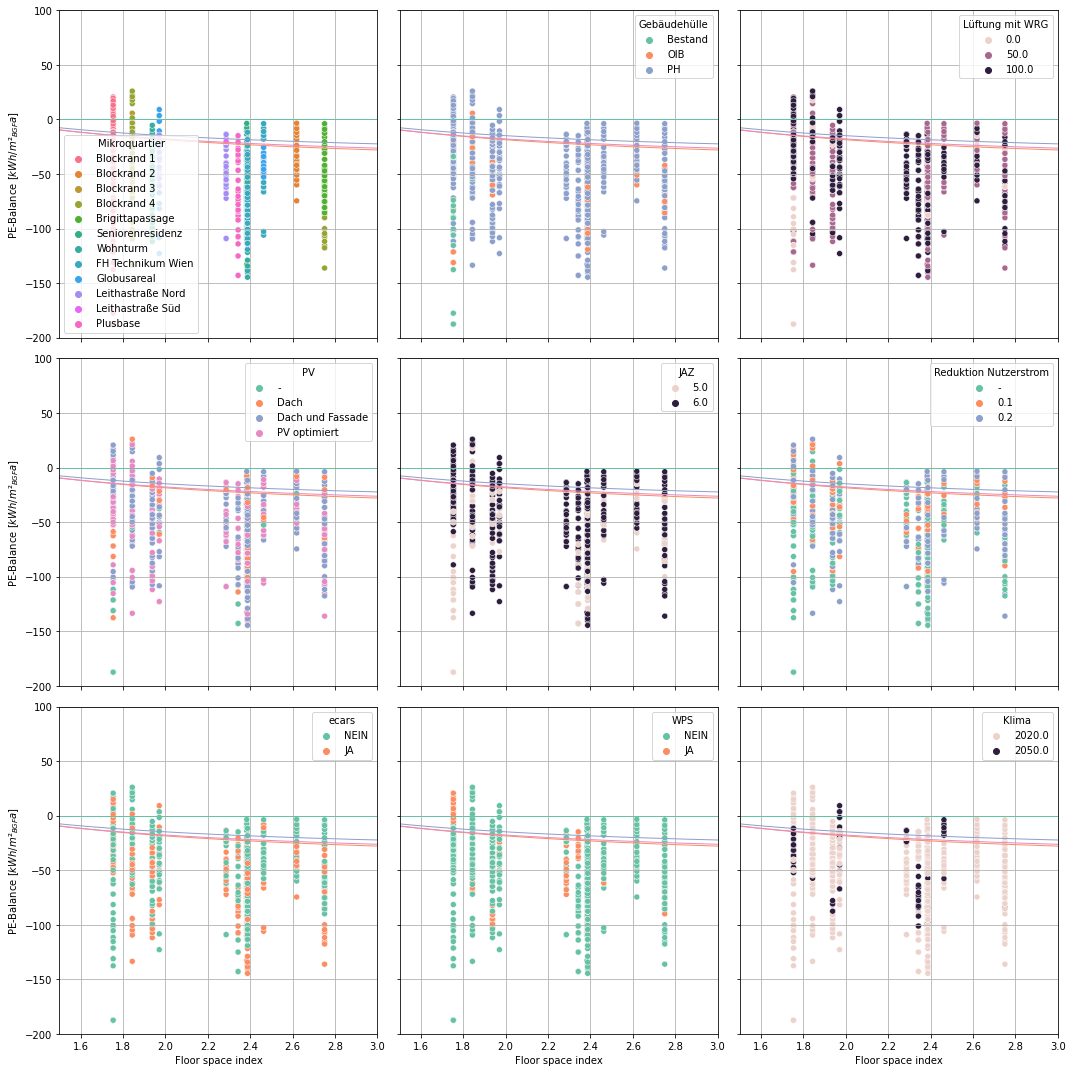

In [13]:
fig, axes = plt.subplots(3,3, figsize=(15,15), sharex=True, sharey=True)
for ax, category in zip(axes.flatten(), subplot_columns):
    plot_context_factor(ax,
                        df=PEQ_alfa,
                        ylims=(-200,100),
                        xlims=(1.5,3),
                        no_legend=True
                        )
    sns.scatterplot(ax=ax,
                    x="GFZ [-]",
                    y=PEB_varname,
                    hue=category,
                    data=df)
plt.tight_layout()

In [14]:
#fig, ax = plt.subplots(1,1, figsize=(12,12))
#plot_context_factor(ax, df=PEQ_alfa, ylims=(-200,100)
#sns.scatterplot(ax=ax,
#                x = "GFZ [-]",
#                y=PEB_varname,
#                hue="PV",
#                data=df)
#plt.tight_layout()

In [15]:
dfmin = df[required]
dfmin.columns

Index(['Name', 'Primärenergiesaldo ohne Dichteausgleich [kWh/m²NGFa].1',
       'PE-Saldo Ziel BGF default (NGF/BGF=0,8) [kWh/m²BGFa].1',
       'PEBedarf [kWh/m²NGFa].4', 'PE-Saldo Ziel NGF [kWh/m²NGFa].1', 'depth',
       'ecars', 'Umweltenergiepotential Innenhof [MWh/a]',
       'Heizenergie [MWh/a]', 'JAZ', 'Linie', 'Reduktion Nutzerstrom', 'WPS',
       'PV', 'Generation', 'Umweltenergiepotential Straße/Gehweg [MWh/a]',
       'Klima', 'Gebäudehülle', 'Kühlenergie [MWh/a]',
       'Umweltenergiepotential Freifläche [MWh/a]', 'Lüftung mit WRG',
       'GFZ [-]', 'Mikroquartier'],
      dtype='object')

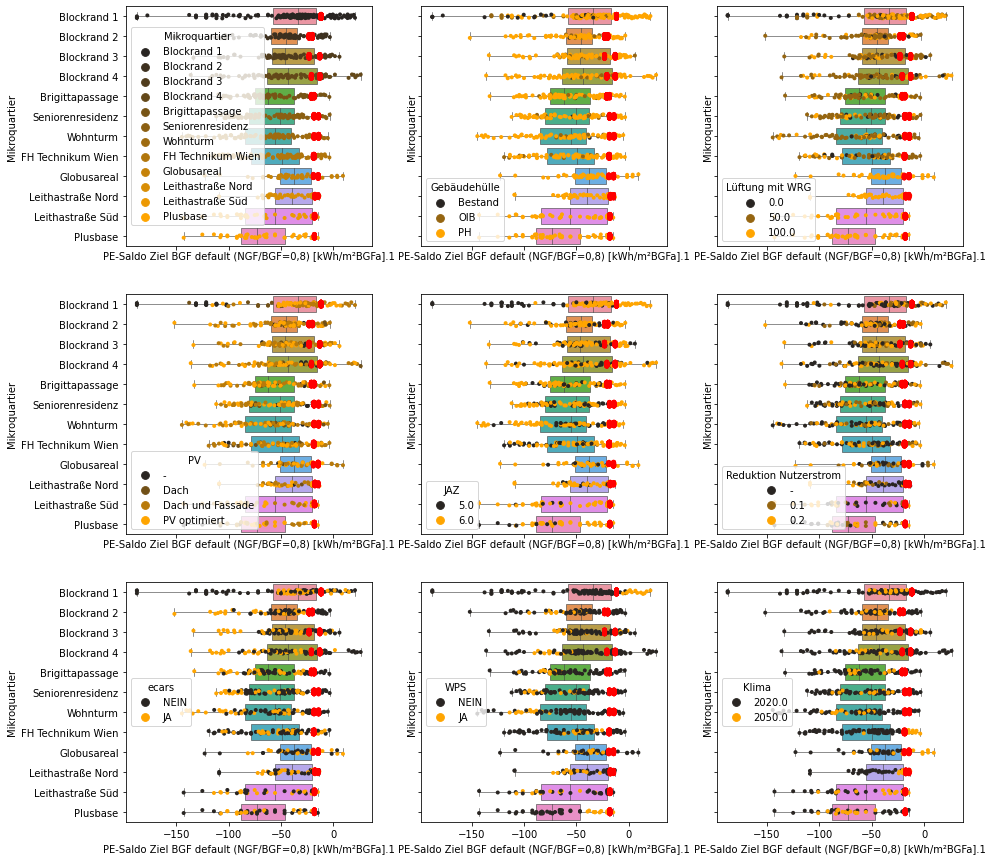

In [16]:
fig, axes = plt.subplots(3,3, figsize=(15,15), sharex=True, sharey=True)
for ax, category in zip(axes.flatten(), subplot_columns):
    sns.boxplot(ax=ax, data=dfmin,
                x=PEB_varname, y="Mikroquartier",
                whis=[0, 100], width=.8, linewidth=0.6
                )

    sns.stripplot(ax=ax, x=PEB_varname, y="Mikroquartier",
              data=dfmin, hue=category, color="orange",
              size=4, linewidth=0)

    sns.stripplot(ax=ax, x='PE-Saldo Ziel BGF default (NGF/BGF=0,8) [kWh/m²BGFa].1', y="Mikroquartier",
              data=dfmin, color="red",
              size=5, linewidth=0)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

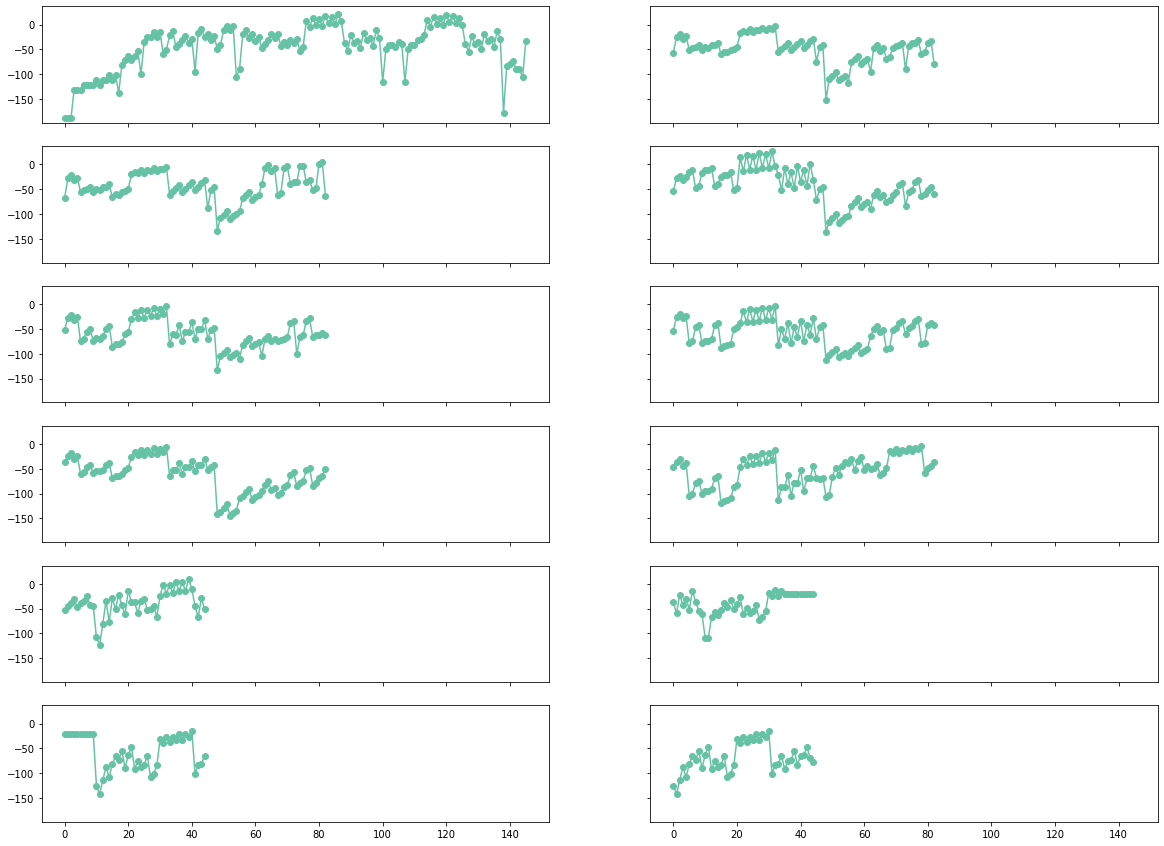

In [17]:
fig, axes = plt.subplots(6,2, figsize=(20,15), sharex=True, sharey=True)
for ax, mqs in zip(axes.flatten(), dfmin.Mikroquartier.unique()):
    ax.plot(np.arange(len(dfmin[dfmin.Mikroquartier==mqs])), PEB_varname,
    data=dfmin[dfmin.Mikroquartier==mqs], linestyle='-', marker='o')
plt.tight_layout

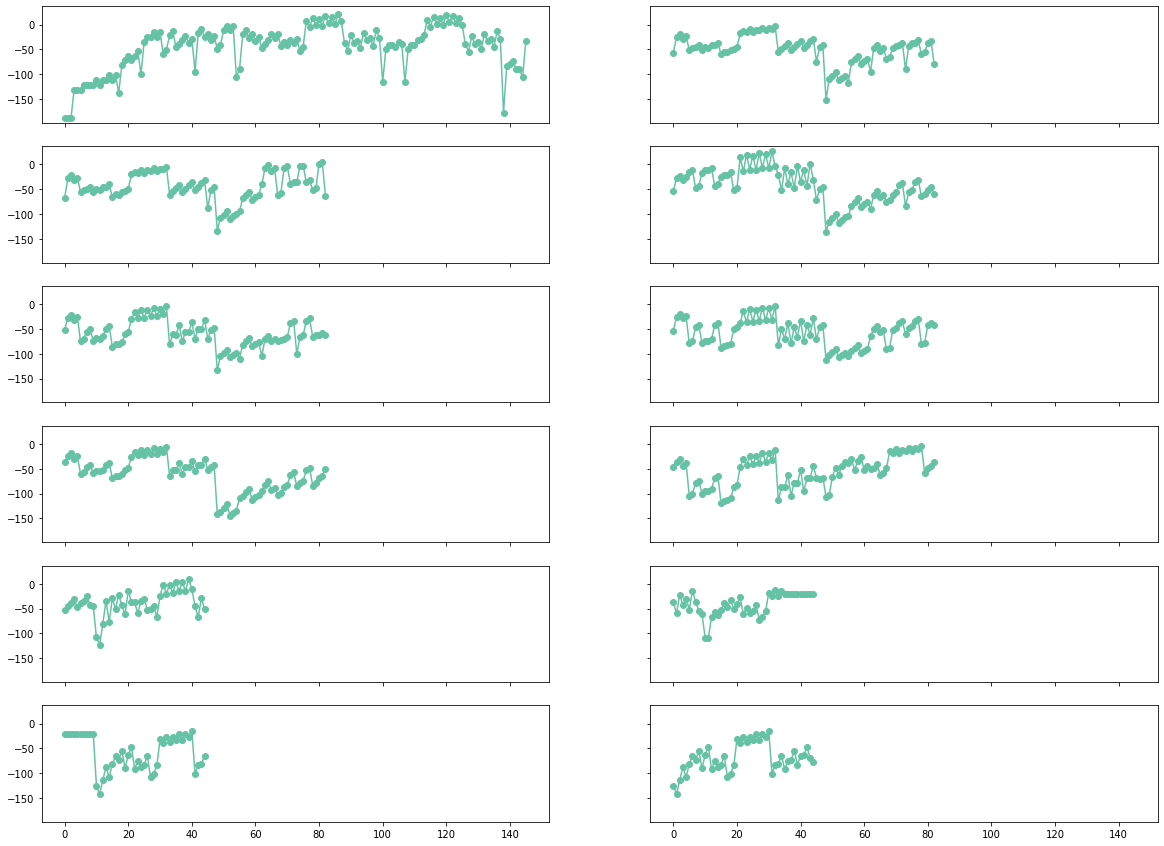

In [18]:
fig, axes = plt.subplots(6,2, figsize=(20,15), sharex=True, sharey=True)
for ax, mqs in zip(axes.flatten(), dfmin.Mikroquartier.unique()):
    ax.plot(np.arange(len(dfmin[dfmin.Mikroquartier==mqs])), PEB_varname,
    data=dfmin[dfmin.Mikroquartier==mqs], linestyle='-', marker='o')


In [19]:
def plot_line(ax, dataframe, xname, yname, labels=None, **kwargs):
    xs = dataframe[xname]
    ys = dataframe[yname]
    #print(kwargs)
    ax.plot(xs, ys, linestyle='-', marker='o', **kwargs)
    if labels is not None:
        labelseries = dataframe[labels]
        for x, y, l in zip(xs,ys,labelseries):
            plt.annotate(l, (x, y), xytext=(x+1,y+2))
            

In [20]:
unique_lines = df.Linie.unique()
anzahl_linien = len(unique_lines)
mq_count = len(df.Mikroquartier.unique())



In [21]:
steps=df.Generation.unique()
print(steps)
steps_pos=np.arange(0, max(df.depth+10), 10)
print(steps_pos)

['Bestand' 'thermische Hülle' 'Lüftung m. WRG' 'Photovoltaik'
 'Gebäudeeffizienz' 'Reduktion Nutzerstrom' 'e-cars' 'Wind-Peak-Shaving'
 'Klima' 'Belegung']
[ 0. 10. 20. 30. 40. 50. 60. 70. 80. 90.]


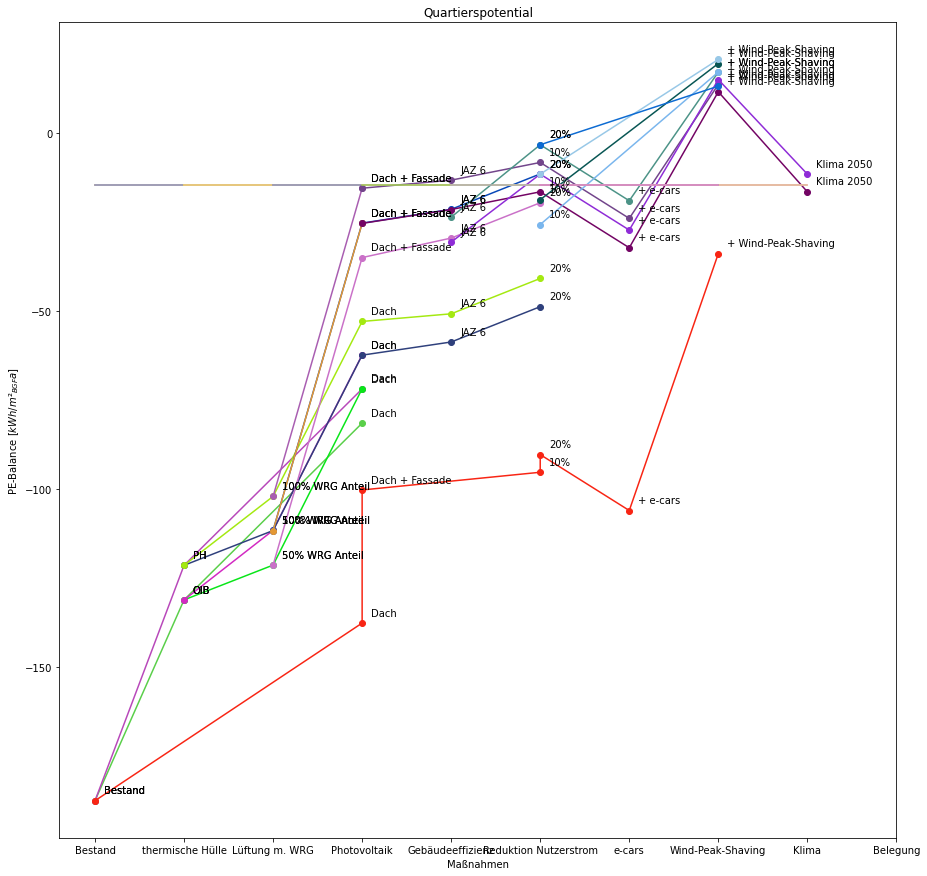

In [22]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
ax.set_ylabel("PE-Balance $[{kWh/m²_{BGF}a}]$")
ax.set_xlabel("Maßnahmen")
ax.set_title("Quartierspotential")
for linie in unique_lines:
    if linie == np.nan:
        continue
    auswahl = df[df.Linie == linie].sort_values(by=["depth"])
    plot_line(ax, dataframe=auswahl, xname="depth", yname=PEB_varname, labels="Description", color=np.random.rand(3,))
    ax.plot(auswahl.depth, auswahl[PEB_target], linestyle='-')
    ax.grid()
    ax.set_xticks(steps_pos)
    ax.set_xticklabels(steps)
    
# to dos: Farbenordnung festlegen
# df-Auswahl verallgemeinern, dass mehrere Qs eingelesen werden können
# xticks sollten nur gesetzt werden, wenn an der Stelle auch Varianten sind

In [23]:
# auswahl der varianten bekommen (df filtern nach linie, oder anderem attribute)

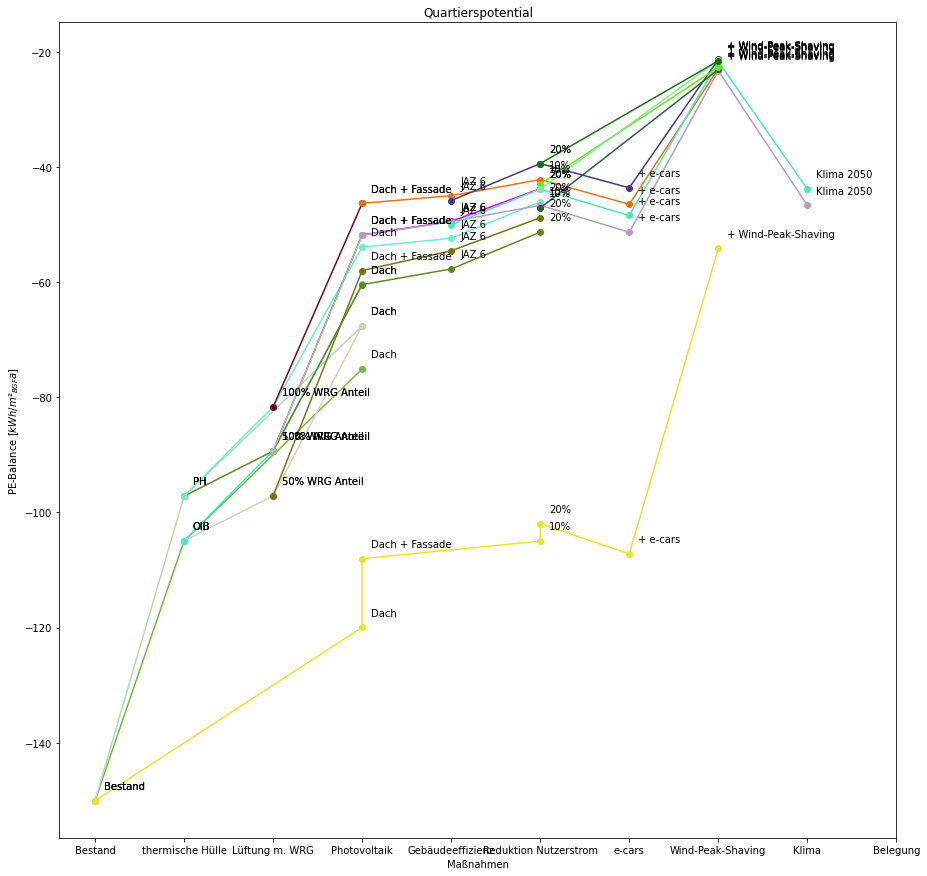

In [24]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
ax.set_ylabel("PE-Balance $[{kWh/m²_{BGF}a}]$")
ax.set_xlabel("Maßnahmen")
ax.set_title("Quartierspotential")
for linie in unique_lines:
    if linie == np.nan:
        continue
    auswahl = df[df.Linie == linie].sort_values(by=("depth"))
    plot_line(ax, dataframe=auswahl, xname="depth", yname=PE_Demand, labels="Description", color=np.random.rand(3,))
    #ax.plot(auswahl.depth, auswahl[PEB_target], linestyle='-')
    ax.grid()
    ax.set_xticks(steps_pos)
    ax.set_xticklabels(steps)

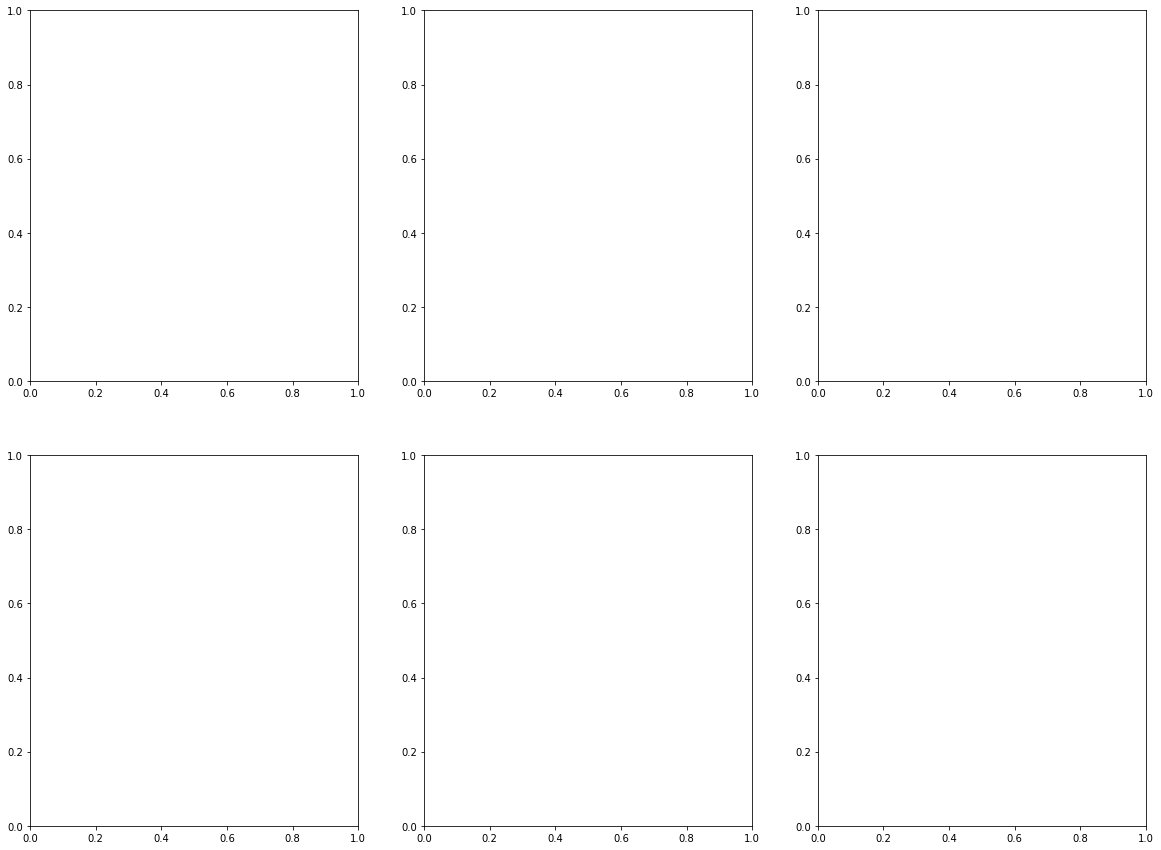

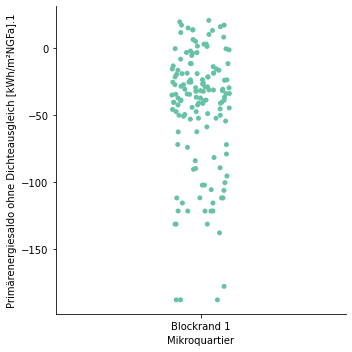

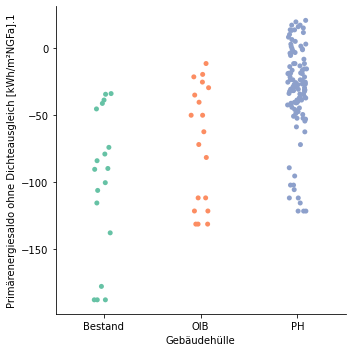

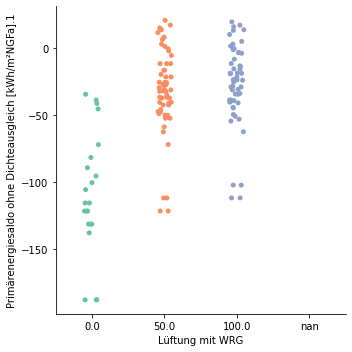

In [25]:
b1 = dfmin[dfmin.Mikroquartier=="Blockrand 1"]
mq_count = 2 #dfmin.Mikroquartier.unique()
cat_count = len(subplot_columns[:3])

fig, axes = plt.subplots(mq_count,cat_count, figsize=(20,15))
for axcol, cat in enumerate(subplot_columns[:3]):
    sns.catplot(ax=axes[0, axcol],
                x=cat,
                y=PEB_varname,
                order=b1[cat].unique(),
                data=b1)

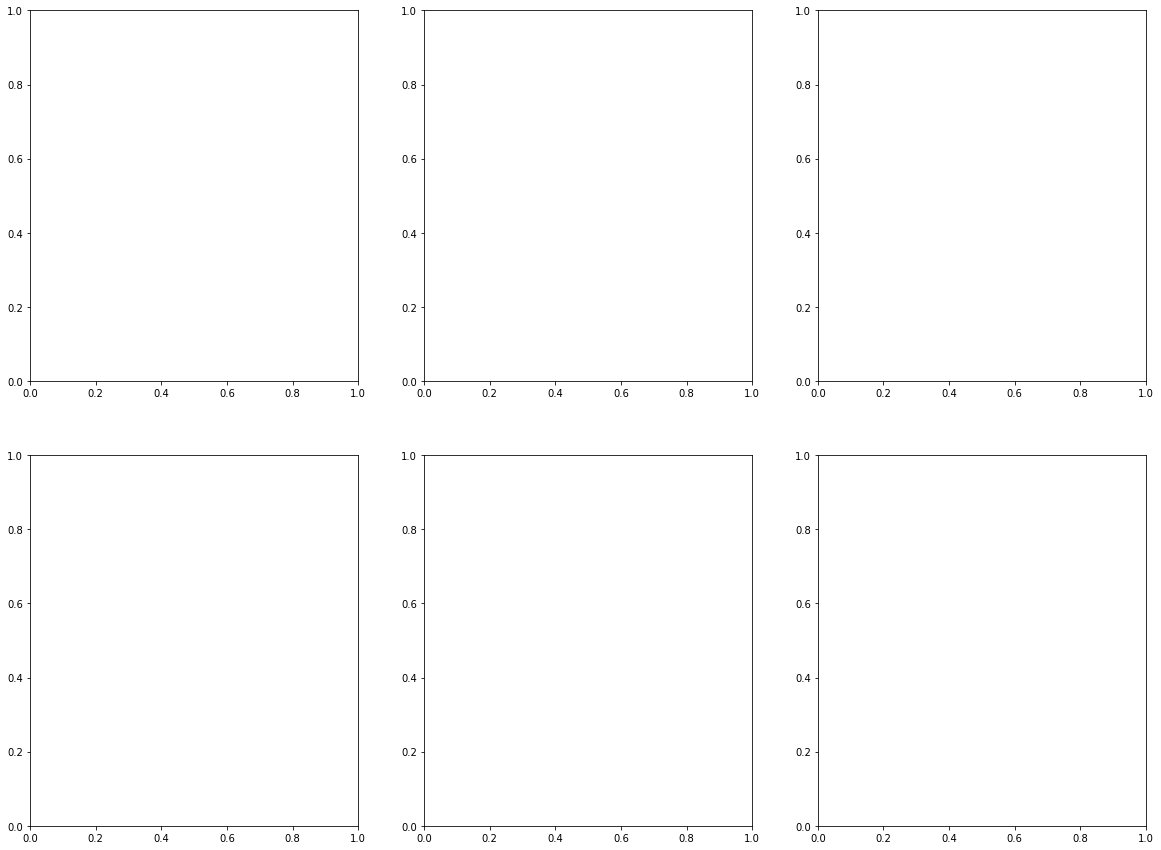

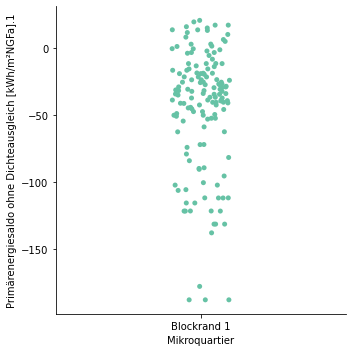

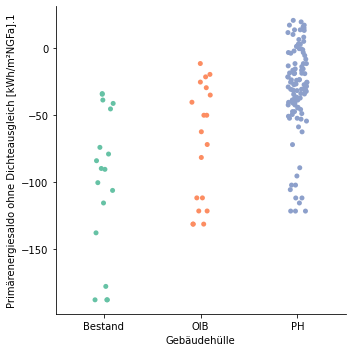

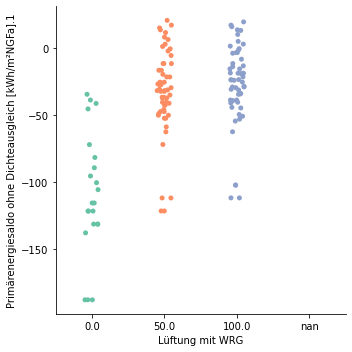

In [26]:
b1 = dfmin[dfmin.Mikroquartier=="Blockrand 1"]
mq_count = 2 #dfmin.Mikroquartier.unique()
cat_count = len(subplot_columns[:3])

fig, axes = plt.subplots(mq_count,cat_count, figsize=(20,15))
for axcol, cat in enumerate(subplot_columns[:3]):
    sns.catplot(ax=axes[0, axcol],
                x=cat,
                y=PEB_varname,
                order=b1[cat].unique(),
                data=b1)